In [13]:
PROJECT_ROOT = "../"
import sys
# The following line adds the parent directory to the python path.
sys.path.insert(0, PROJECT_ROOT) 

In [14]:
from importlib import reload
import src.experiment.sample_utils as su
import src.experiment.experiment_utils as exp
import src.dataset_handling.pamap.write_pamap as wp
import src.experiment.dataset_experiments.pamap_experiments as p_exp
import src.experiment.experiment_cpu as exp_cpu

reload(su)
reload(exp)
reload(wp)
reload(p_exp)
reload(exp_cpu)

<module 'src.experiment.experiment_cpu' from '/home/hphi344/Documents/GS-DBSCAN-Analysis/analysis_notebooks/../src/experiment/experiment_cpu.py'>

In [5]:
k = 10
m = 50
eps = 0.04
distancesBatchSize=3000

dtype = "f32"

parquet_name = f"pamap_sample_results_k{k}_m{m}_eps{eps}_{dtype}_dbs{distancesBatchSize}"

In [52]:
params = exp.RunParams(d=wp.PAMAP_DIM, D=1024, minPts=50, k=k, m=m, eps=eps, alpha=1.2,
                        distancesBatchSize=distancesBatchSize, distanceMetric="COSINE",
                        clusterBlockSize=256, clusterOnCpu=True, needToNormalize=True, print_cmd=True,
                        verbose=False, useBatchDbscan=True, timeIt=True, useBatchABMatrices=True,
                        useBatchNorm=True,
                        datasetDType=dtype, ABatchSize=10_000, BBatchSize=28, miniBatchSize=10_000, normBatchSize=10_000, ignoreAdjListSymmetry=False)


results = p_exp.run_pamap_samples(params, parquet_name)

Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/pamap/handled/samples/f32/pamap_sample_n100000_f32.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__pamap_sample_n100000_f32_n100000_d51_D1024_mp50_k10_m50_e0.04.json --n 100000 --d 51 --D 1024 --minPts 50 --k 10 --m 50 --eps 0.04 --alpha 1.2 --distancesBatchSize 3000 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f32 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize --useBatchClustering --useBatchABMatrices --useBatchNorm --timeIt
Standard Output:
 Running GsDBSCAN-CPP
Params: 

## PARAMS ##

Data Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/data/pamap/handled/samples/f32/pamap_sample_n100000_f32.bin
Output Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__pamap_sample_n100000_f32_n100000_d5

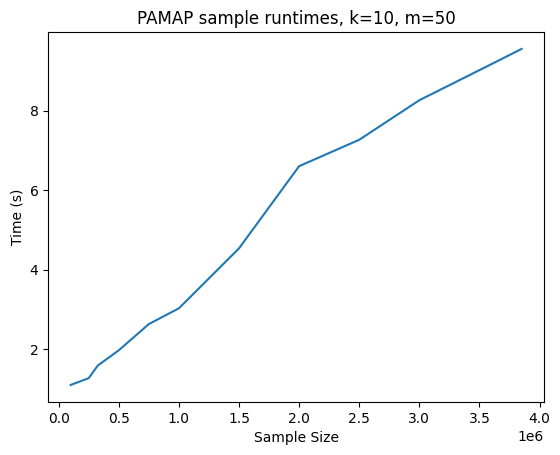

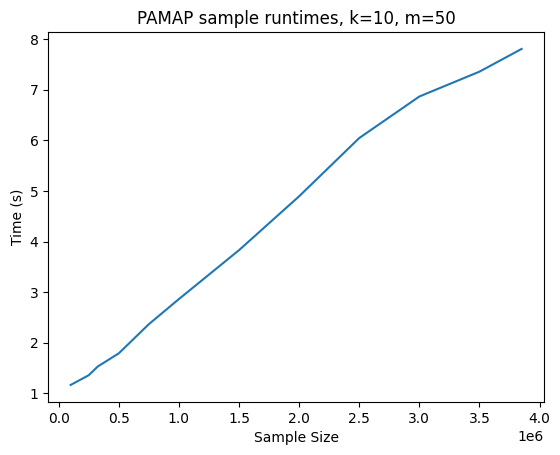

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

results_df = pd.read_parquet(f"/home/hphi344/Documents/GS-DBSCAN-Analysis/results/pamap/samples/parquets/{parquet_name}.parquet")

fig, ax, _ = su.plot_sample_time_results(results_df, save_path="PAMAP_sample_runtimes.png", title=f"PAMAP sample runtimes, k={k}, m={m}")

comp_df = pd.read_parquet(r"/home/hphi344/Documents/GS-DBSCAN-Analysis/results/pamap/samples/parquets/pamap_sample_results_k10_m50_eps0.04_f16.parquet")

fig, ax, _ = su.plot_sample_time_results(comp_df, title=f"PAMAP sample runtimes, k={k}, m={m}")
plt.show()


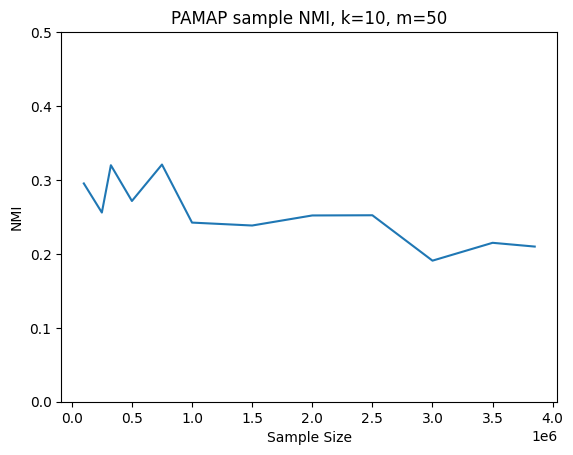

In [55]:
fig, ax = su.plot_sample_nmi_results(results_df, save_path="PAMAP_sample_nmi.png", title=f"PAMAP sample NMI, k={k}, m={m}")
plt.show()

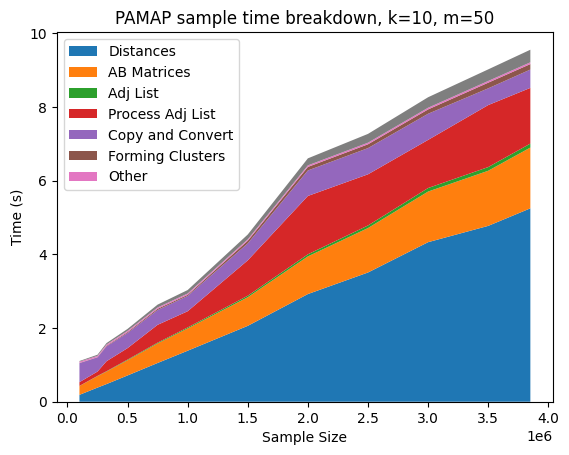

In [9]:
fig, ax = su.plot_sample_time_breakdown(results_df, save_file="PAMAP_sample_time_breakdown.png", title=f"PAMAP sample time breakdown, k={k}, m={m}")

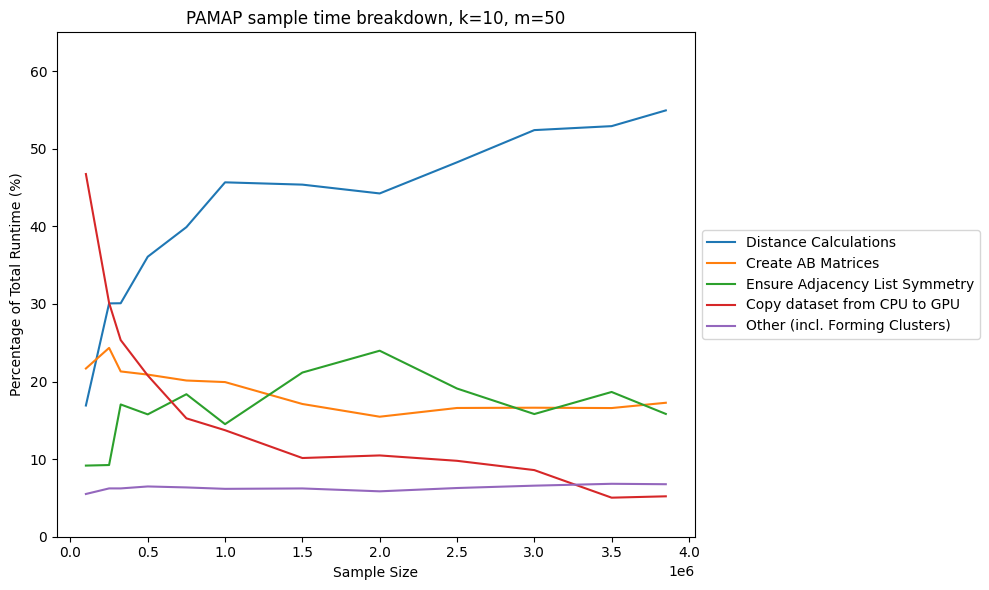

In [27]:
from importlib import reload
import src.experiment.sample_utils as su
import pickle

reload(su)

fig, ax = su.plot_sample_time_breakdown_perc(results_df, save_file="PAMAP_sample_time_breakdown.png", title=f"PAMAP sample time breakdown, k={k}, m={m}", ymax=65)

with open("fig_breakdown_pamap.pkl", "wb") as f:
    pickle.dump((fig, ax), f)

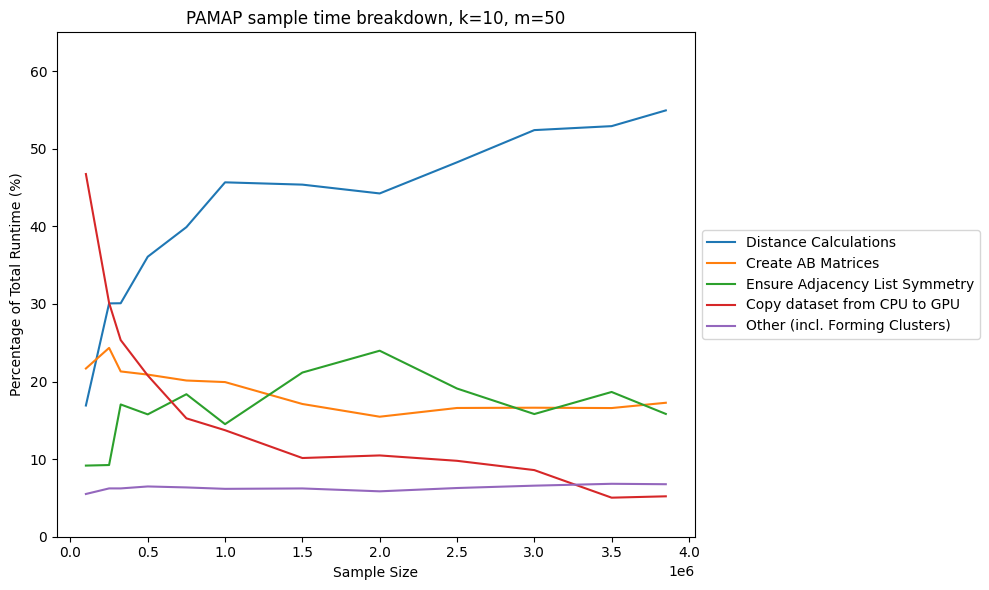

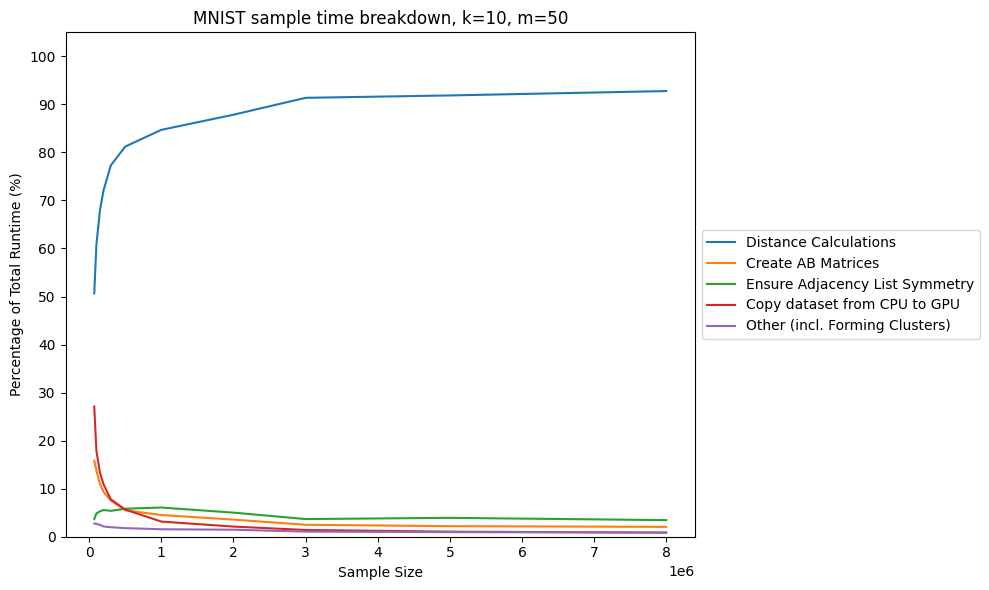

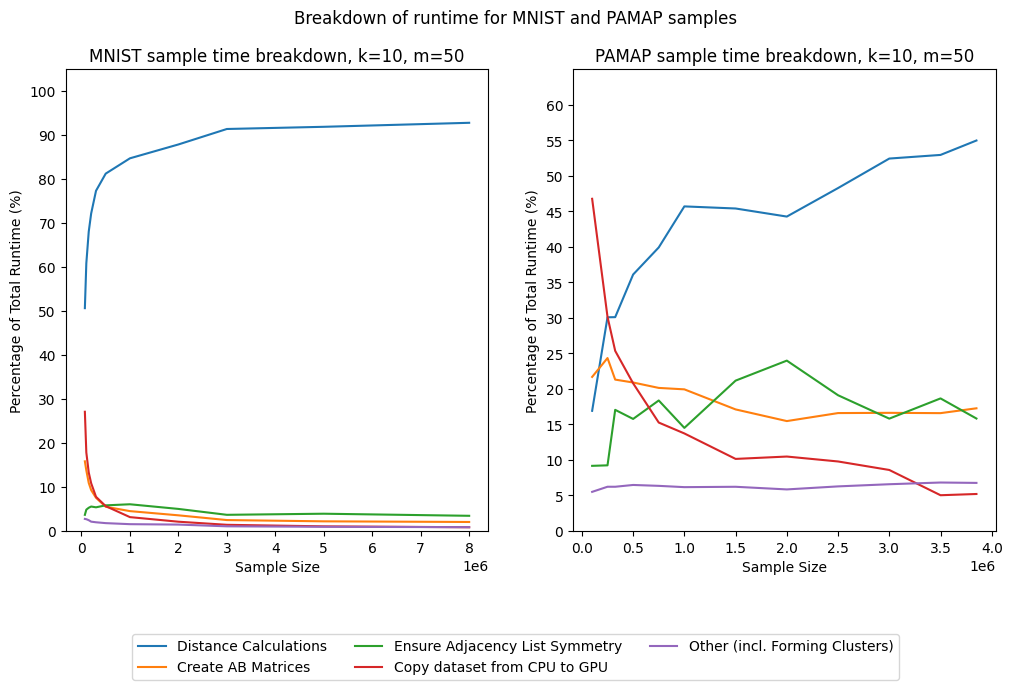

In [34]:
import pickle
import matplotlib.pyplot as plt

with open("fig_breakdown_pamap.pkl", "rb") as f:
    fig_1, ax_1 = pickle.load(f)

with open("fig_breakdown_mnist.pkl", "rb") as f:
    fig_2, ax_2 = pickle.load(f)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for line in ax_2.get_lines():
    axes[0].plot(line.get_xdata(), line.get_ydata())

for line in ax_1.get_lines():
    axes[1].plot(line.get_xdata(), line.get_ydata())

axes[0].set_title(ax_2.get_title())
axes[1].set_title(ax_1.get_title())
axes[0].set_xlabel(ax_2.get_xlabel())
axes[1].set_xlabel(ax_1.get_xlabel())
axes[0].set_ylabel(ax_2.get_ylabel())
axes[1].set_ylabel(ax_1.get_ylabel())

axes[0].set_ylim(0, 105)
axes[1].set_ylim(0, 65)
axes[0].set_yticks(range(0, 105, 10))
axes[1].set_yticks(range(0, 65, 5))


handles, labels = ax_1.get_legend_handles_labels()

fig.legend(handles, labels, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=3)
fig.suptitle("Breakdown of runtime for MNIST and PAMAP samples")
plt.savefig("plots/mnist_pamap_breakdown.png", bbox_inches="tight", dpi=400)

plt.show()

In [7]:
d = wp.PAMAP_DIM
eps = 0.04
minPts = 50
k = 10
m = 50
numThreads = 64
dist = "Cosine"

run_params_cpu = exp_cpu.CpuRunParams(d, eps, minPts, 1024, k, m, numThreads, dist, datasetFilename=None, verbose=True,
                            output_file=None, file_type="bin", labels_filename=None,
                            labels_file_type="bin")

In [8]:
results_samples_cpu_df = p_exp.run_pamap_samples_cpu(run_params_cpu, sample_results_df_name=f"pamap_samples_cpu_results_k{k}_m{m}_eps{eps}_nt{numThreads}")

eps: 0.04
minPts: 50
n_points: 100000
n_features: 51
n_proj: 1024
topK: 10
topM: 50
distance: Cosine
cluster noise: 0
kernel features: 51
sigma: 2600
interval sampling: 0.4
sDbscan-1NN prob: 0
n_threads: 64
Check X supporting distance time = 7[ms]
Build index time = 340[ms]
Number of core points: 3535
Find core points time = 220[ms]
Clustering noisy point time = 0[ms]
Number of clusters: 153
Form clusters time  (including clustering noise) = 4[ms]
Writing times to file: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/pamap/samples/raw/cpu_pamap_samples_cpu_results_k10_m50_eps0.04_nt64_n100000_times.txt
Times map written to file successfully.
NMI: 0.35891430785645606
eps: 0.04
minPts: 50
n_points: 250000
n_features: 51
n_proj: 1024
topK: 10
topM: 50
distance: Cosine
cluster noise: 0
kernel features: 51
sigma: 2600
interval sampling: 0.4
sDbscan-1NN prob: 0
n_threads: 64
Check X supporting distance time = 29[ms]
Build index time = 810[ms]
Number of core points: 20750
Find core points 

Average Speedup: 1.9918606845204003


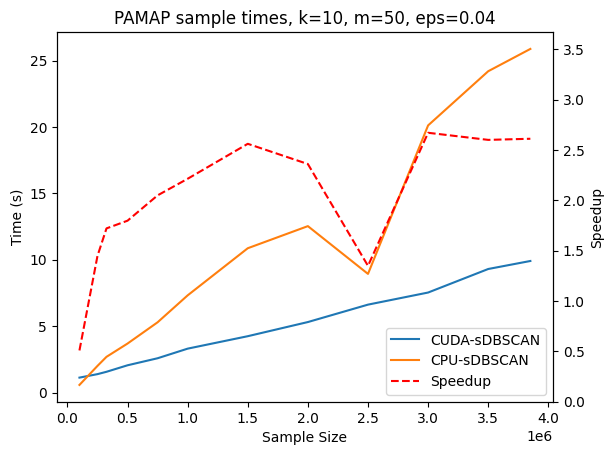

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

results_samples_df = pd.read_parquet(f"/home/hphi344/Documents/GS-DBSCAN-Analysis/results/pamap/samples/parquets/pamap_sample_results_k{run_params_cpu.k}_m{run_params_cpu.m}_eps{run_params_cpu.eps}_{dtype}.parquet")
results_samples_cpu_df = pd.read_parquet(f"/home/hphi344/Documents/GS-DBSCAN-Analysis/results/pamap/samples/parquets/pamap_samples_cpu_results_k{run_params_cpu.k}_m{run_params_cpu.m}_eps{run_params_cpu.eps}_nt{numThreads}.parquet")

# Convert cpu ms times to ns
for i in range(len(results_samples_cpu_df)):
    row = results_samples_cpu_df.iloc[i]
    for metric, time in row["times"].items():
        row["times"][metric] = time / 1e3

su.plot_compare_cpu_gpu_time(results_samples_df, results_samples_cpu_df, add_speedup=True, save_path="PAMAP_sample_time_comparison_nt64.png", title=f"PAMAP sample times, k={run_params_cpu.k}, m={run_params_cpu.m}, eps={run_params_cpu.eps}")

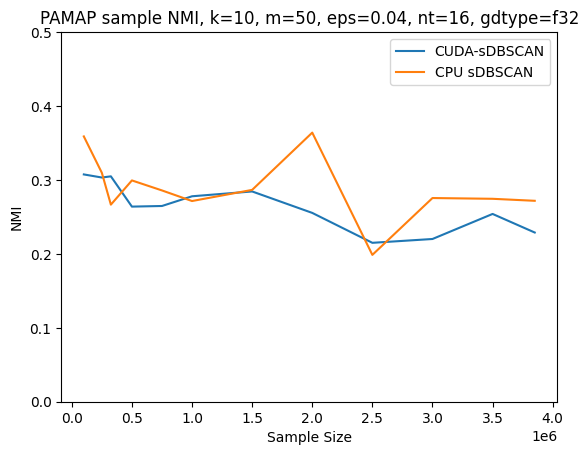

In [16]:
su.plot_compare_cpu_gpu_nmi(results_samples_df, results_samples_cpu_df, title=f"PAMAP sample NMI, k={run_params_cpu.k}, m={run_params_cpu.m}, eps={run_params_cpu.eps}")

In [18]:
k = 5
m = 200
eps = 0.04

pamap_full_results_dir = "/home/hphi344/Documents/GS-DBSCAN-Analysis/results/pamap/full"

dtype = "f32"

parquet_name = f"pamap_full_results_k{k}_m{m}_eps{eps}_{dtype}"

params = exp.RunParams(d=wp.PAMAP_DIM, D=1024, minPts=50, k=k, m=m, eps=eps, alpha=1.2,
                        distancesBatchSize=1000, distanceMetric="COSINE",
                        clusterBlockSize=256, clusterOnCpu=True, needToNormalize=True, print_cmd=True,
                        verbose=False, useBatchDbscan=True, timeIt=True, useBatchABMatrices=True,
                        useBatchNorm=True,
                        datasetDType=dtype, ABatchSize=10_000, BBatchSize=28, miniBatchSize=10_000, normBatchSize=10_000, ignoreAdjListSymmetry=False, 
                        outputfile_dir=pamap_full_results_dir)

In [19]:
p_exp.run_pamap_normal(params)

Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/pamap/handled/pamap_f32.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/pamap/full/results__pamap_f32_n3850505_d51_D1024_mp50_k5_m200_e0.0400.json --n 3850505 --d 51 --D 1024 --minPts 50 --k 5 --m 200 --eps 0.04 --alpha 1.2 --distancesBatchSize 1000 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f32 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize --useBatchClustering --useBatchABMatrices --useBatchNorm --timeIt
Standard Output:
 Running GsDBSCAN-CPP
Params: 

## PARAMS ##

Data Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/data/pamap/handled/pamap_f32.bin
Output Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/pamap/full/results__pamap_f32_n3850505_d51_D1024_mp50_k5_m200_e0.0400.json
n: 3850505
d: 51
D: 102

,args,clusterLabels,numClusters,times,params,nmi
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",355,"{'adjList': 246826, 'constructABMatrices': 198...","{'d': 51, 'minPts': 50, 'alpha': 1.2, 'distanc...",0.244281


In [6]:
d = wp.PAMAP_DIM
eps = 0.04
k = 10
m = 50
minPts = 50
numThreads = 64
dist = "Cosine"

run_params_cpu = exp_cpu.CpuRunParams(d, eps, minPts, 1024, k, m, numThreads, dist, datasetFilename=None, verbose=True,
                            output_file=f"{pamap_full_results_dir}/pamap_full_k{k}_m{m}_eps{eps}_nt{numThreads}", file_type="bin", labels_filename=None,
                            labels_file_type="bin")

results_full_cpu_df = p_exp.run_pamap_normal_cpu(run_params_cpu, parquet_path=f"/home/hphi344/Documents/GS-DBSCAN-Analysis/results/pamap/full/parmap_full_results_cpu_k{k}_m{m}_eps{eps}_nt{numThreads}.parquet")

eps: 0.04
minPts: 50
n_points: 3850505
n_features: 51
n_proj: 51
topK: 10
topM: 50
distance: Cosine
cluster noise: 0
kernel features: 51
sigma: 2600
interval sampling: 0.4
sDbscan-1NN prob: 0
n_threads: 64
Check X supporting distance time = 392[ms]
Build index time = 876[ms]
Number of core points: 28325
Find core points time = 3562[ms]
Clustering noisy point time = 0[ms]
Number of clusters: 184
Form clusters time  (including clustering noise) = 31[ms]
Writing times to file: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/pamap/full/pamap_full_k10_m50_eps0.04_nt64_times.txt
Times map written to file successfully.
NMI: 0.10549005260748776


In [21]:
d = wp.PAMAP_DIM
eps = 0.04
k = 5
m = 50
minPts = 50
numThreads = 64
dist = "Cosine"

run_params_cpu = exp_cpu.CpuRunParams(d, eps, minPts, 1024, k, m, numThreads, dist, datasetFilename=None, verbose=True,
                            output_file=f"{pamap_full_results_dir}/pamap_full_k{k}_m{m}_eps{eps}_nt{numThreads}", file_type="bin", labels_filename=None,
                            labels_file_type="bin")

results_full_cpu_df = p_exp.run_pamap_normal_cpu(run_params_cpu, parquet_path=f"/home/hphi344/Documents/GS-DBSCAN-Analysis/results/pamap/full/parmap_full_results_cpu_k{k}_m{m}_eps{eps}_nt{numThreads}.parquet")

eps: 0.04
minPts: 50
n_points: 3850505
n_features: 51
n_proj: 1024
topK: 5
topM: 50
distance: Cosine
cluster noise: 0
kernel features: 51
sigma: 2600
interval sampling: 0.4
sDbscan-1NN prob: 0
n_threads: 64
Check X supporting distance time = 393[ms]
Build index time = 12071[ms]
Number of core points: 136104
Find core points time = 6203[ms]
Clustering noisy point time = 0[ms]
Number of clusters: 599
Form clusters time  (including clustering noise) = 89[ms]
Writing times to file: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/pamap/full/pamap_full_k5_m50_eps0.04_nt64_times.txt
Times map written to file successfully.
NMI: 0.25040139783736415
